In [1]:
import pandas as pd

oil_prices = pd.read_excel('./data/전체주유소_가격.xlsx')
oil_prices

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,강원특별자치도,SK에너지(주)강릉주유소,강원 강릉시 강릉대로 432 (포남동),SK에너지,033-652-5155,Y,-,1629,1534,1300
1,강원특별자치도,대륙주유소,강원 영월군 한반도면 강원남로 140,GS칼텍스,033-372-2998,N,-,1605,1499,1300
2,강원특별자치도,한반도농협남면지점주유소,강원 영월군 남면 영월로 971,NH-OIL,033-372-1616,Y,-,1599,1499,1300
3,강원특별자치도,주천주유소,강원 영월군 주천면 송학주천로 1462,S-OIL,033-372-7475,Y,-,1599,1499,1300
4,강원특별자치도,한반도농협주유소,강원 영월군 주천면 송학주천로 1367,NH-OIL,033-372-2020,Y,-,1599,1499,1300
...,...,...,...,...,...,...,...,...,...,...
12301,충청북도,대덕클린주유소,충북 음성군 생극면 음성로 1661,S-OIL,043-883-0009,N,-,1735,1665,1425
12302,충청북도,삼정주유소,충북 음성군 금왕읍 무극로 89,GS칼텍스,043-883-3400,N,-,1738,1638,1400
12303,충청북도,태평양주유소,충북 음성군 음성읍 음성로 482-0,S-OIL,043-873-9206,N,-,-,1558,-
12304,충청북도,삼부주유소,충북 제천시 내토로 733 (장락동),SK에너지,043-653-5189,Y,-,1615,1515,-


## EDA (Exploratory Data Analysis)

- 탐색적 데이터 분석

In [2]:
# 지역별 분석

oil_prices['지역'].value_counts()

경기도        2918
경상북도       1329
경상남도       1185
충청남도       1134
전북특별자치도     959
충청북도        903
전라남도        842
강원특별자치도     631
서울특별시       440
부산광역시       361
대구광역시       351
인천광역시       316
광주광역시       242
울산광역시       223
대전광역시       212
제주특별자치도     193
세종특별자치시      67
Name: 지역, dtype: int64

In [3]:
# 경기도 데이터 뽑기

kg_oil = oil_prices.loc[oil_prices['지역'] == '경기도',
               ['고급휘발유','휘발유','경유','실내등유']]
kg_oil

,고급휘발유,휘발유,경유,실내등유
631,1945,1645,1545,-
632,-,1657,1557,-
633,1849,1649,1549,-
634,1849,1649,1549,-
635,1918,1645,1545,1480
...,...,...,...,...
3544,-,1595,1495,1330
3545,-,1881,1763,1708
3546,-,1595,1497,1300
3547,1929,1679,1559,-


In [4]:
kg_oil.info()
# object = 문자열

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2918 entries, 631 to 3548
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고급휘발유   2918 non-null   object
 1   휘발유     2918 non-null   object
 2   경유      2918 non-null   object
 3   실내등유    2918 non-null   object
dtypes: object(4)
memory usage: 114.0+ KB


### 문자형을 숫자형으로 변환

In [5]:
# NaN값 - 을 0 으로 변경

kg_oil.loc[kg_oil['고급휘발유'] == '-','고급휘발유'] = 0
kg_oil.loc[kg_oil['휘발유'] == '-','휘발유'] = 0
kg_oil.loc[kg_oil['경유'] == '-','경유'] = 0
kg_oil.loc[kg_oil['실내등유'] == '-','실내등유'] = 0
kg_oil

,고급휘발유,휘발유,경유,실내등유
631,1945,1645,1545,0
632,0,1657,1557,0
633,1849,1649,1549,0
634,1849,1649,1549,0
635,1918,1645,1545,1480
...,...,...,...,...
3544,0,1595,1495,1330
3545,0,1881,1763,1708
3546,0,1595,1497,1300
3547,1929,1679,1559,0


In [8]:
# 반복문으로 변환

column_convert = ['고급휘발유', '휘발유', '경유', '실내등유'] 

for column in column_convert:
    kg_oil.loc[kg_oil[column] == '-', column] = 0

kg_oil

,고급휘발유,휘발유,경유,실내등유
631,1945,1645,1545,0
632,0,1657,1557,0
633,1849,1649,1549,0
634,1849,1649,1549,0
635,1918,1645,1545,1480
...,...,...,...,...
3544,0,1595,1495,1330
3545,0,1881,1763,1708
3546,0,1595,1497,1300
3547,1929,1679,1559,0


In [6]:
# 문자열 값을 숫자열값으로 변경

kg_oil['고급휘발유'] = kg_oil['고급휘발유'].astype('int')
kg_oil['휘발유'] = kg_oil['휘발유'].astype('int')
kg_oil['경유'] = kg_oil['경유'].astype('int')
kg_oil['실내등유'] = kg_oil['실내등유'].astype('int')
kg_oil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2918 entries, 631 to 3548
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   고급휘발유   2918 non-null   int32
 1   휘발유     2918 non-null   int32
 2   경유      2918 non-null   int32
 3   실내등유    2918 non-null   int32
dtypes: int32(4)
memory usage: 68.4 KB


In [9]:
# 반복문으로 변환

columns_to_convert = ['고급휘발유', '휘발유', '경유', '실내등유']

for column in columns_to_convert:
    kg_oil[column] = kg_oil[column].astype('int')

kg_oil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2918 entries, 631 to 3548
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   고급휘발유   2918 non-null   int32
 1   휘발유     2918 non-null   int32
 2   경유      2918 non-null   int32
 3   실내등유    2918 non-null   int32
dtypes: int32(4)
memory usage: 68.4 KB


In [13]:
kg_oil.mean()

고급휘발유     437.053804
휘발유      1622.881426
경유       1528.398561
실내등유      765.859493
dtype: float64

In [31]:
# 시리즈 -> 데이터 프레임
import numpy as np 

df = kg_oil.replace(0,np.nan,inplace=True)

df = kg_oil.mean().reset_index()

df.columns = ['oil type','avg price']
df

,oil type,avg price
0,premium,1881.007375
1,gasoline,1631.829083
2,diesel,1534.181975
3,kerosene,1409.954574


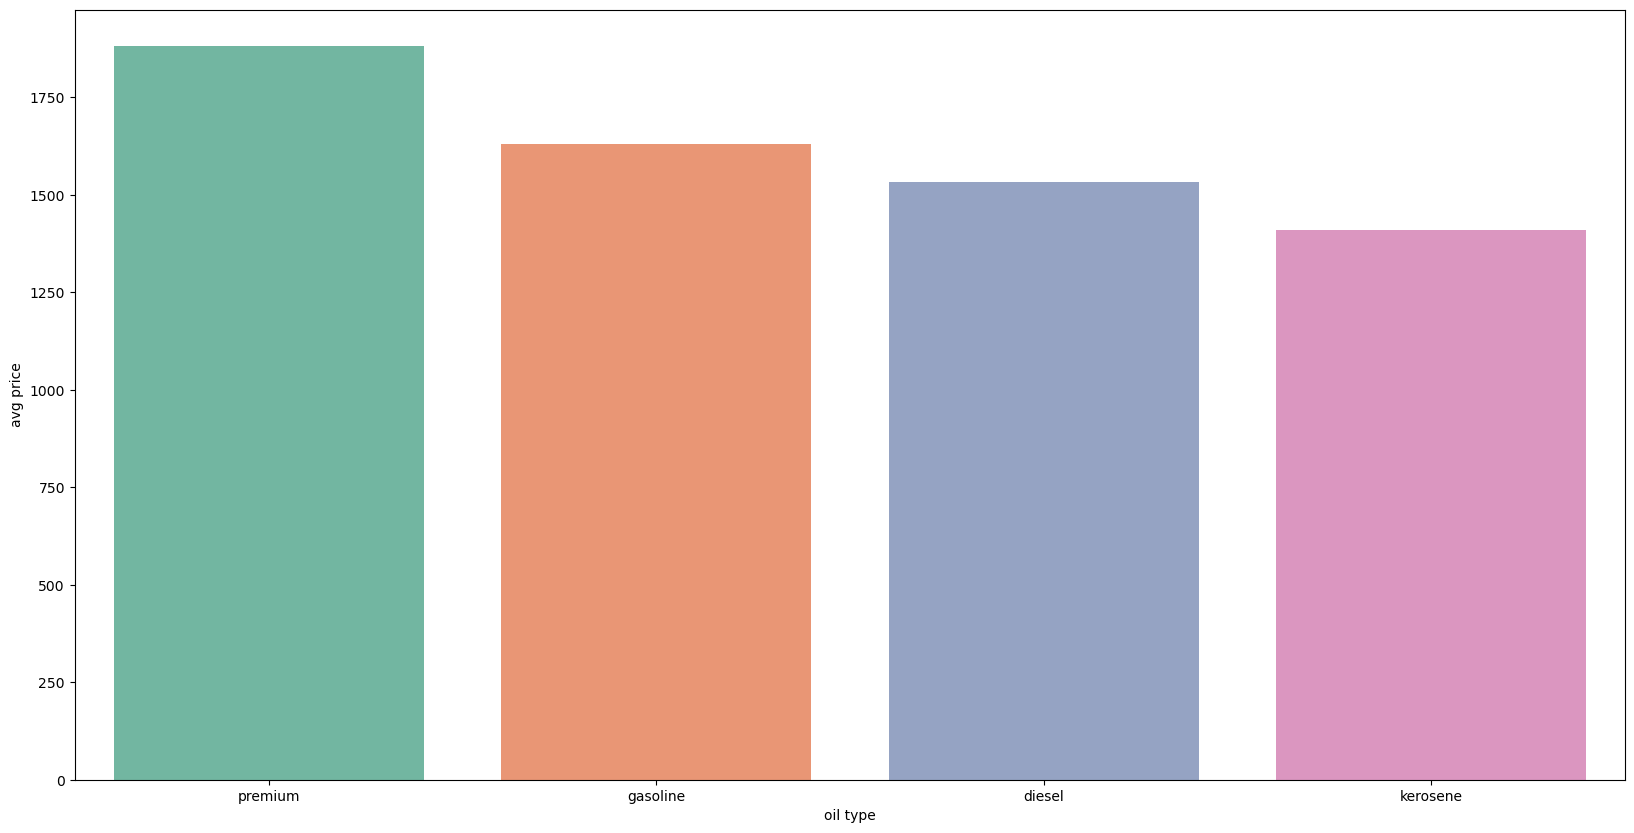

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(20,10))

df['oil type'] = ['premium','gasoline','diesel','kerosene']

sns.barplot(data=df,
            x='oil type',
            y='avg price',
            palette='Set2')

plt.show()

In [33]:
kg_oil.columns = ['premium','gasoline','diesel','kerosene']
kg_oil

,premium,gasoline,diesel,kerosene
631,1945.0,1645.0,1545.0,NaN
632,NaN,1657.0,1557.0,NaN
633,1849.0,1649.0,1549.0,NaN
634,1849.0,1649.0,1549.0,NaN
635,1918.0,1645.0,1545.0,1480.0
...,...,...,...,...
3544,NaN,1595.0,1495.0,1330.0
3545,NaN,1881.0,1763.0,1708.0
3546,NaN,1595.0,1497.0,1300.0
3547,1929.0,1679.0,1559.0,NaN


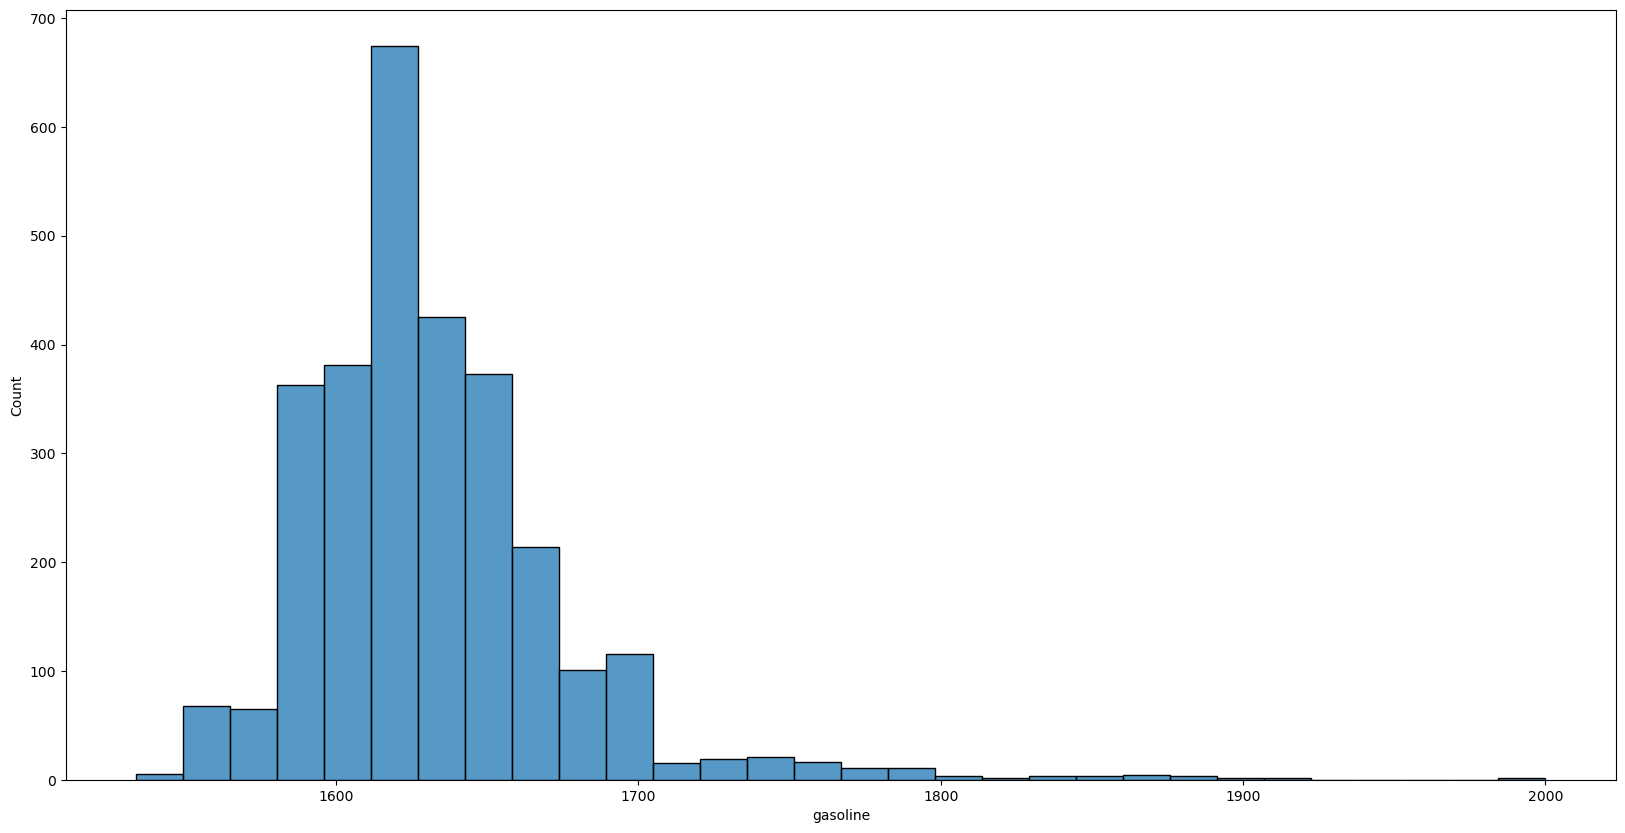

In [36]:
plt.figure(figsize=(20,10))

sns.histplot(data=kg_oil,
             x='gasoline',
             bins=30)

plt.show()

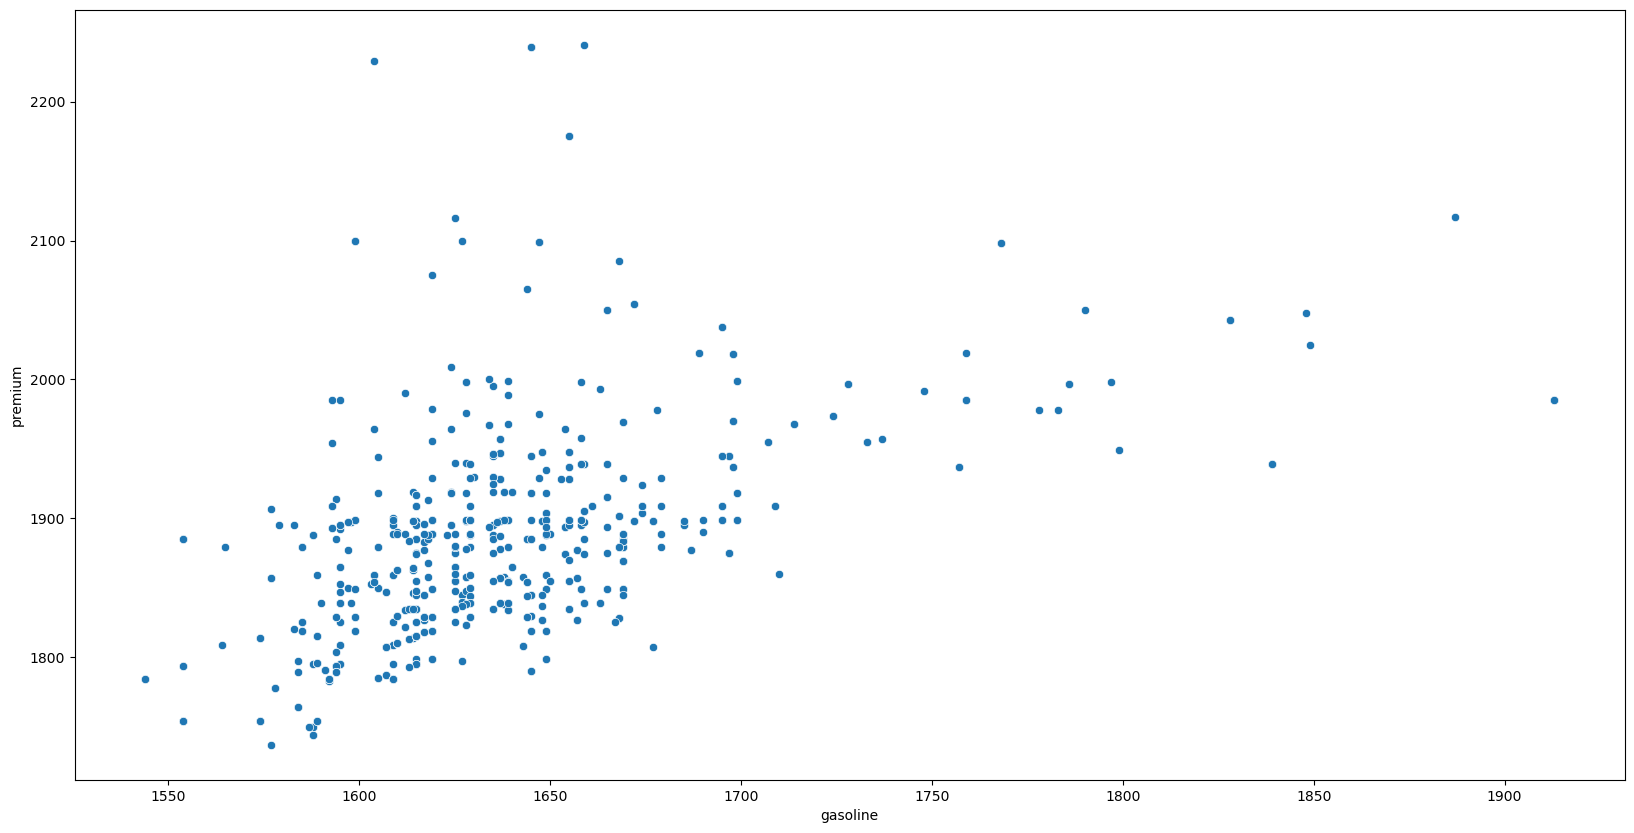

In [38]:
plt.figure(figsize=(20,10))

sns.scatterplot(data=kg_oil,
             x='gasoline',
             y='premium',
             ci=None)

plt.show()